<a href="https://colab.research.google.com/github/fagonzalezo/sklearn-kdcrf/blob/master/examples/approximation_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup code

In [2]:
# Install kdrcf if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
  
except:
  IN_COLAB = False

if IN_COLAB:
    
    !git clone https://github.com/fagonzalezo/sklearn-kdcrf.git
    !mv sklearn-kdcrf/kdcrf .
    

In [3]:
%matplotlib inline
import gzip

import pandas as pd
import pylab as pl
import h5py


In [4]:
import os
os.getcwd()
os.chdir('/tf/home/sklearn-kdcrf')
print(os.getcwd())
print(os.listdir())

from kdcrf import KDClassifierRF
from kdcrf import RBFSamplerORF


/tf/home/sklearn-kdcrf
['.gitignore', '.travis.yml', 'setup.py', 'LICENSE', '.vscode', 'environment.yml', '.git', 'README.rst', '.coveragerc', '.DS_Store', '.circleci', '.ipynb_checkpoints', 'data', 'MANIFEST.in', 'doc', 'appveyor.yml', '.readthedocs.yml', 'kdcrf', 'setup.cfg', 'requirements.txt', 'examples']


In [5]:
##approximate kernel RFF

from sklearn.model_selection import train_test_split

import numpy as np
from kdcrf import KDClassifierRF
from kdcrf import RBFSamplerORF
from sklearn import datasets, svm
# Import datasets, classifiers and performance metrics
!pip install wget
import wget
from sklearn.preprocessing import MinMaxScaler

import h5py

Defaulting to user installation because normal site-packages is not writeable


In [35]:
def classify(data_train, targets_train, data_test, targets_test, gammas, experiment="1"):
    
    
    scores = {}

    classifiers = {#'svm':('gamma', svm.SVC()), 
                   'kdc exact':('gamma', KDClassifierRF(approx='exact')),
                   'lrff+ 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                         n_components=data_train.shape[1]*5,
                                                         random_state=1)),            
                    'dmrff 2000':('gamma', KDClassifierRF(approx='dmrff', 
                                                         n_components=data_train.shape[1]*5,
                                                         random_state=1)),            
                   'dmorf 2000':('gamma', KDClassifierRF(approx='dmrff', 
                                                        n_components=data_train.shape[1]*5,
                                                        random_state=1, 
                                                        sampler=RBFSamplerORF(n_components=data_train.shape[1]*5, random_state=1))),            
                   'lrff+ orf 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                        n_components=data_train.shape[1]*5,
                                                        random_state=1, 
                                                        sampler=RBFSamplerORF(n_components=data_train.shape[1]*3, random_state=1))),

    }

    for clfn in classifiers.keys():
        scores[clfn] = []

    for gamma in gammas:
        print('gamma:', gamma,' ',end='')
        for clfn, (gname, clf) in classifiers.items():
            print('clfn:', clfn)
            clf.set_params(**{gname:gamma})
            clf.fit(data_train, targets_train)
            score = clf.score(data_test, targets_test)
            scores[clfn].append(score)
            print('clfn: class ', score)
            with h5py.File("/tf/home/sklearn-kdcrf/examples/experiment_cifar_score_2.h5", mode="a") as file:
                file.create_dataset(clfn + "_" + str(gamma), data=score)
    return classifiers, scores

## Kernel Density Classification  for letters

In [10]:
## https://archive.ics.uci.edu/ml/datasets/Letter+Recognition
letter = wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data")

In [11]:

letters = pd.read_csv("letter-recognition.data", header=None)
print(letters.head())
print(letters.describe())

vector = letters.values[:,1:]
labels = letters.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.3, random_state=42)

  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3  N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
                 1             2             3            4             5   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

gamma: 0.0078125  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.059333333333333335
clfn: lrff+ 2000
clfn: class  0.4635
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.09
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.09416666666666666
clfn: lrff+ orf 2000
clfn: class  0.43416666666666665
gamma: 0.015625  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.06166666666666667
clfn: lrff+ 2000
clfn: class  0.4638333333333333
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.095
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.10766666666666666
clfn: lrff+ orf 2000
clfn: class  0.43716666666666665
gamma: 0.03125  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.0965
clfn: lrff+ 2000
clfn: class  0.4671666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.128
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.145
clfn: lrff+ orf 2000
clfn: class  0.43833333333333335
gamma: 0.0625  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.13216666666666665
clfn: lrff+ 2000
clfn: class  0.4716666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.18383333333333332
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.1975
clfn: lrff+ orf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.451
gamma: 0.125  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.186
clfn: lrff+ 2000
clfn: class  0.4716666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.2926666666666667
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.284
clfn: lrff+ orf 2000
clfn: class  0.4365
gamma: 0.25  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.30616666666666664
clfn: lrff+ 2000
clfn: class  0.4285
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.397
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.36566666666666664
clfn: lrff+ orf 2000
clfn: class  0.45916666666666667
gamma: 0.5  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.42433333333333334
clfn: lrff+ 2000
clfn: class  0.4141666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.4166666666666667
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.41933333333333334
clfn: lrff+ orf 2000
clfn: class  0.427
gamma: 1  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.4985
clfn: lrff+ 2000
clfn: class  0.46016666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.4855
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.527
clfn: lrff+ orf 2000
clfn: class  0.488
gamma: 2  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.548
clfn: lrff+ 2000
clfn: class  0.45416666666666666
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.5585
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.5578333333333333
clfn: lrff+ orf 2000
clfn: class  0.5293333333333333
gamma: 4  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.6185
clfn: lrff+ 2000
clfn: class  0.492
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.6463333333333333
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.6665
clfn: lrff+ orf 2000
clfn: class  0.535
gamma: 8  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.7308333333333333
clfn: lrff+ 2000
clfn: class  0.4886666666666667
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.7125
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.7263333333333334
clfn: lrff+ orf 2000
clfn: class  0.48033333333333333
gamma: 16  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.8415
clfn: lrff+ 2000
clfn: class  0.29883333333333334
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.6246666666666667
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.6385
clfn: lrff+ orf 2000
clfn: class  0.346
gamma: 32  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.9261666666666667
clfn: lrff+ 2000
clfn: class  0.17883333333333334
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.404
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.40116666666666667
clfn: lrff+ orf 2000
clfn: class  0.19466666666666665
gamma: 64  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.9558333333333333
clfn: lrff+ 2000
clfn: class  0.11083333333333334
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.22016666666666668
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.188
clfn: lrff+ orf 2000
clfn: class  0.11616666666666667
gamma: 128  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.9568333333333333
clfn: lrff+ 2000
clfn: class  0.0735
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.12216666666666667
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.12966666666666668
clfn: lrff+ orf 2000
clfn: class  0.0665
gamma: 256  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.9543333333333334
clfn: lrff+ 2000
clfn: class  0.057666666666666665
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.09333333333333334
clfn: dmorf 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.08566666666666667
clfn: lrff+ orf 2000
clfn: class  0.0515


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by pass

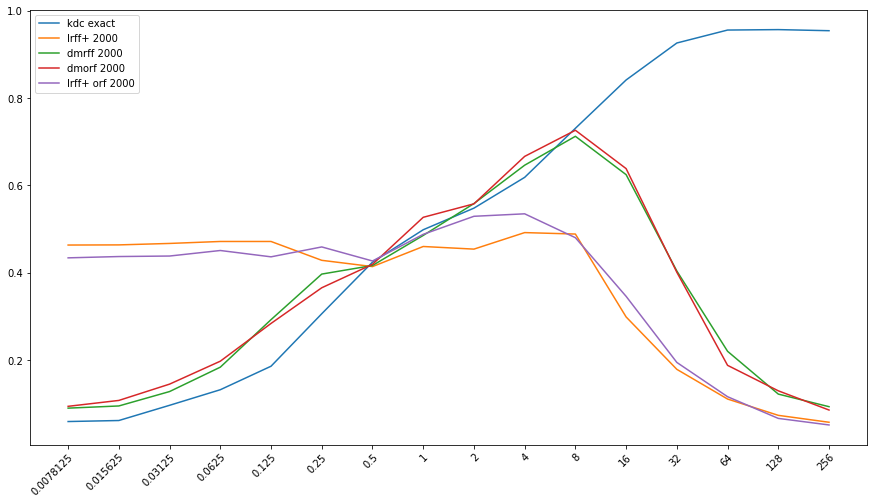

In [29]:
gammas = [2**i for i in range(-7,9)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



In [ ]:
with h5py.File("usps.h5", 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)


In [ ]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(X_tr, y_tr, X_te, y_te, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



In [ ]:
# Import datasets, classifiers and performance metrics


# The digits dataset
digits = datasets.load_digits(n_class=9)

n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (data[:n_samples // 2],
                             digits.target[:n_samples // 2])


# Now predict the value of the digit on the second half:
data_test, targets_test = (data[n_samples // 2:],
                           digits.target[n_samples // 2:])

In [ ]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(data_train, targets_train, data_test, targets_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()


## Moon Database

In [ ]:
from sklearn.datasets import  make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [ ]:

gammas = [2**i for i in range(-7,10)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()


## Forest database

In [ ]:
forest = wget.download("http://archive.ics.uci.edu/ml//machine-learning-databases/covtype/covtype.data.gz")

In [ ]:
dataset = pd.read_csv('covtype.data.gz', nrows=100, compression='gzip',
                   error_bad_lines=False)

dataset = dataset.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
        dataset[:,:-1], dataset[:, -1], test_size=0.33, random_state=42)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

gammas = [2**i for i in range(-9,4)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



## MNIST

In [ ]:
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)
        

In [ ]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) 
        
    return features, labels

train = {}
test = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
random_train = np.random.choice(range(train['features'].shape[0]), 10000, replace=False)
random_test = np.random.choice(range(test['features'].shape[0]), 10000, replace=False)

In [ ]:
train_images = train['features'][random_train,:]
train_labels = train['labels'][random_train]
test_images = test['features'][random_test,:]
test_labels = test['labels'][random_test]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

In [ ]:
train_labels

In [ ]:
gammas = [2**i for i in range(-8,8)]
classifiers, scores = classify(train_images, train_labels, test_images, test_labels, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



## Gisette

In [ ]:

wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/gisette/GISETTE/gisette_train.data")
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/gisette/GISETTE/gisette_train.labels")
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/gisette/GISETTE/gisette_valid.data")
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/gisette/gisette_valid.labels")

In [ ]:

train_data = pd.read_csv("gisette_train.data", header=None, sep=" ")
train_labels = pd.read_csv("gisette_train.labels", header=None, sep=" ")
test_data = pd.read_csv("gisette_valid.data", header=None, sep=" ")
test_labels = pd.read_csv("gisette_valid.labels", header=None, sep=" ")
print(train_data.head())
print(train_data.describe())

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
gammas = [2**i for i in range(-3,16)]
classifiers, scores = classify(train_data, train_labels, test_data, test_labels, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



## Cifar database


In [6]:
from examples.load_cifar_10 import cifar10

train_images, train_labels, test_images, test_labels = cifar10(path='data', is_one_hot=False)

Downloaded cifar-10-binary.tar.gz to data


In [7]:
train_images.shape

(50000, 3072)

In [ ]:
random_train = np.random.choice(range(train_images.shape[0]), 10000, replace=False)
random_test = np.random.choice(range(test_images.shape[0]), 5000, replace=False)


train_images = train_images[random_train,:]
train_labels = train_labels[random_train]
test_images = test_images[random_test,:]
test_labels = test_labels[random_test]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)


In [ ]:
gammas = [2**i for i in range(-8,8)]
classifiers, scores = classify(train_images, train_labels, test_images, test_labels, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



# Extract Features from cifar with BIT - GOOGLE

In [8]:
#@title Imports
!pip install tensorflow_hub
!pip install tensorflow_datasets

import tensorflow as tf
import tensorflow_hub as hub

import tensorflow_datasets as tfds

import time

from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

import os




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
# Load model into KerasLayer
model_url = "https://tfhub.dev/google/bit/m-r101x3/1"
module = hub.KerasLayer(model_url)


In [10]:
def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)  
  return image

def preprocess_batch_images(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [image.shape[0], image.shape[1], image.shape[2], image.shape[3]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)  
  return image

In [11]:
module.build([None, 32, 32, 3])

In [14]:
#mdule.get_weights()

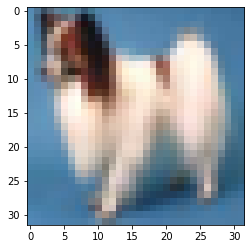

In [12]:
def display_image(position):
    image = np.reshape(train_images[position,:], (3,32,32))
    image = image.transpose((1,2,0))
    plt.imshow(image)
display_image(4000)    

In [13]:
train_images_reshape = np.reshape(train_images, (train_images.shape[0], 3,32,32))
train_images_reshape = train_images_reshape.transpose((0,2,3,1))
reshape_images_train = preprocess_batch_images(train_images_reshape)

features_images_train = module(reshape_images_train)

In [14]:
features_images_train.shape


TensorShape([50000, 6144])

In [15]:
test_images_reshape = np.reshape(test_images, (test_images.shape[0], 3,32,32))
test_images_reshape = test_images_reshape.transpose((0,2,3,1))
reshape_images_test = preprocess_batch_images(test_images_reshape)

features_images_test = module(reshape_images_test)

In [16]:
features_images_test.shape

TensorShape([10000, 6144])

In [17]:
scaler = MinMaxScaler()
scaler.fit(features_images_train)
features_images_train = scaler.transform(features_images_train)
features_images_test = scaler.transform(features_images_test)

In [22]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(features_images_train, train_labels)
print(ridge_classifier.score(features_images_test, test_labels))


0.6481


In [24]:
svc_classifier = svm.LinearSVC()
svc_classifier.fit(features_images_train, train_labels)
score = svc_classifier.score(features_images_test, test_labels)
print(score)


c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5827


In [25]:
svc_classifier = svm.SVC()
svc_classifier.fit(features_images_train, train_labels)
score = svc_classifier.score(features_images_test, test_labels)
print(score)

0.6734


In [21]:
kdc_classifier = KDClassifierRF(approx='exact')
kdc_classifier.fit(features_images_train, train_labels)
score = kdc_classifier.score(features_images_test, test_labels)
print(score)

0.4817


In [18]:
#print(np.bincount(kdc_classifier.predict(features_images_test)))
print(kdc_classifier.predict_proba(features_images_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
gammas = [2**i for i in range(-5,4)]
classifiers, scores = classify(features_images_train, train_labels, features_images_test, test_labels, gammas, "cifar")
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()




gamma: 0.03125  clfn: kdc exact


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.4268
clfn: lrff+ 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


clfn: class  0.4218
clfn: dmrff 2000


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [26]:

module = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   trainable=False)
features = module(reshape_images_train)   # A batch with shape [batch_size, num_features].


In [6]:
with h5py.File("/tf/home/sklearn-kdcrf/examples/experiment_cifar_score_2.h5", mode="r") as file:
    for key in file.keys():
        print(key, ":", file[key][()])

kdc exact_0.03125 : 0.4268
lrff+ 2000_0.03125 : 0.4218


In [30]:
classifiers = {#'svm':('gamma', svm.SVC()), 
                   'kdc exact': 1,
                   'lrff+ 2000':1,            
                    'dmrff 2000':1,            
                   'dmorf 2000':1,            
                   'lrff+ orf 2000':1,

    }

In [29]:
scores = {
       'kdc exact': [0.4075, 0.4109, 0.4167, 0.4268, 0.4482, 0.5074, 0.5722, 0.5131, 0.4817, 0.4742],
   'lrff+ 2000': [0.4018, 0.4135, 0.4248, 0.4117, 0.2666, 0.1015, 0.102, 0.0945, 0.1003, 0.1009],            
    'dmrff 2000': [0.4043, 0.4198, 0.4336, 0.4377, 0.1739, 0.0999, 0.1008, 0.099, 0.1004, 0.0985],            
   'dmorf 2000': [0.41, 0.4152, 0.4271, 0.4329, 0.1711, 0.0981, 0.1061, 0.0987, 0.0984, 0.0978],            
   'lrff+ orf 2000':[0.4078, 0.4104, 0.4165, 0.4045, 0.2604, 0.102, 0.0996, 0.0959, 0.097, 0.0979],
}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

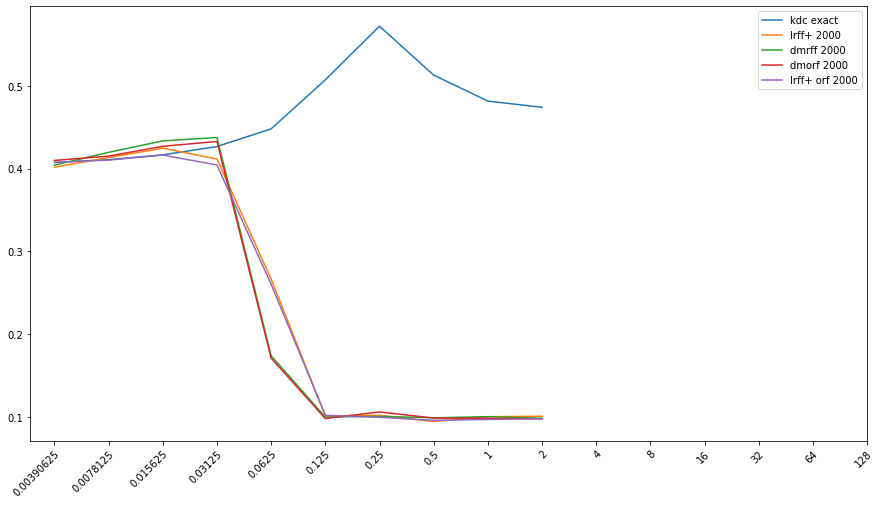

In [33]:
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(10), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()